In [1]:
# Import Your Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Part 1

### Your Histogram Equalization Function

In [35]:
def hist_equ(image):
    '''
    input:
    image (ndarray): input image
    output:
    output_image (ndarray): enhanced image
    '''
    
    ############
    # Your code
    # Start
    output_image = image.copy()
    x,y = image.shape
    pixels_num = x*y
    color_num = 256
    image_histogram = np.zeros(color_num)
    ex_sum = np.zeros(color_num)
    image_cdf=[None]*color_num
    for i in range(x):
        for j in range(y):
            image_histogram[image[i, j]] += 1
    
    for i in range(color_num):
        ex_sum[i] = image_histogram[i]
        if i > 0:
            ex_sum[i] += ex_sum[i - 1]
    sum =0
    
    for i in range(0,color_num):
      image_cdf[i]= round((color_num - 1)*(ex_sum[i]/pixels_num))
    for i in range(x):
            for j in range(y):
              output_image[i,j]=image_cdf[image[i,j]]
    
    # End
    
    return output_image

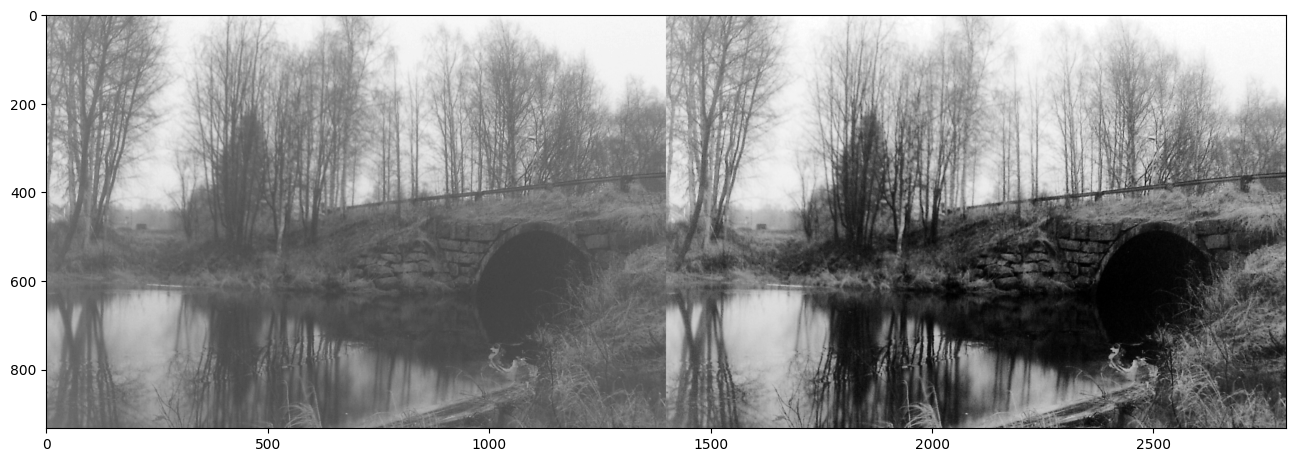

In [36]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
equ = hist_equ(img)
# END

res = np.hstack((img, equ)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

### Histogram Equalization OpenCV Library

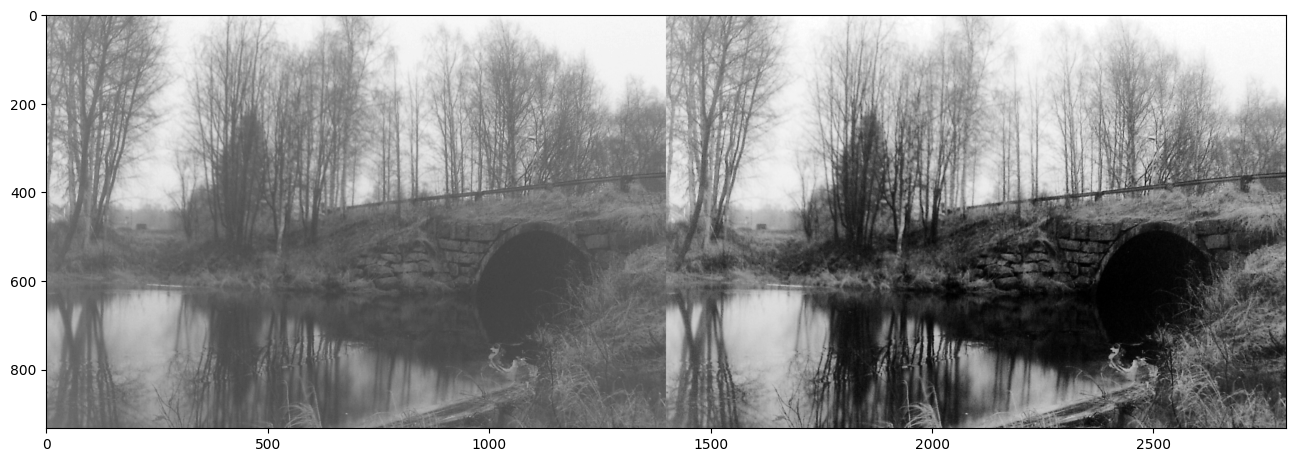

In [37]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
equ = cv2.equalizeHist(img)
# END

res = np.hstack((img, equ)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

## Part 2

### CLAHE OpenCV Library

In [38]:
def CLAHE(image, gridSize, clip_limit):
    '''
    inputs:
    image (ndarray): input image
    gridSize (tuple): window size
    clip_limit (int): threshold for contrast limiting
    output:
    output_image (ndarray): improved image
    '''

    ############
    # Your code
    # Start
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=gridSize)
    output_image = clahe.apply(img)
    # End

    return output_image

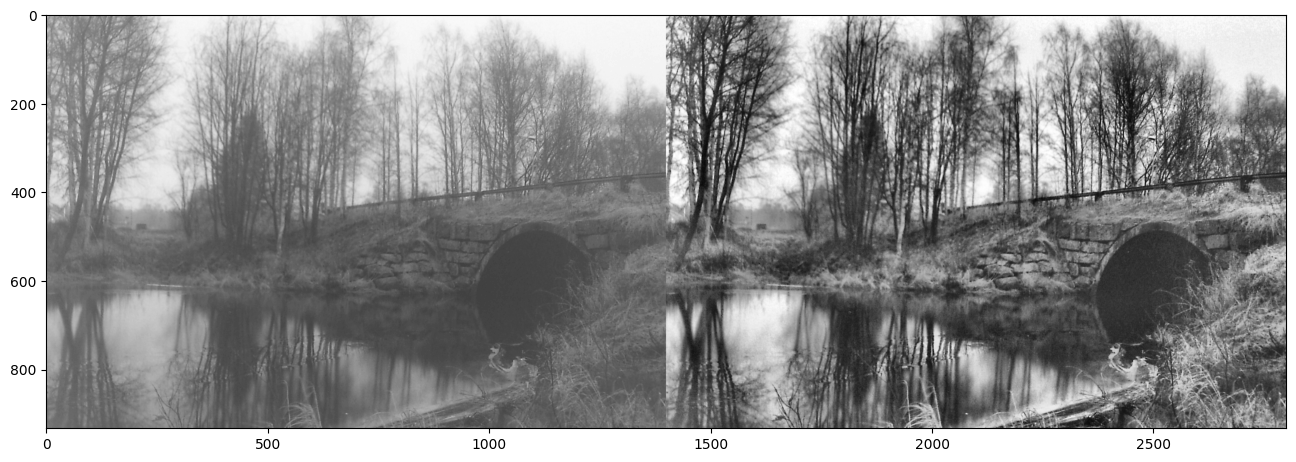

In [43]:
img = cv2.imread('River.jpg', 0)

### YOUR CODE ###
# START
clh = CLAHE(img, (8,8), 3.0)
# END

res = np.hstack((img, clh)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

## Part 3
Repeat for City image

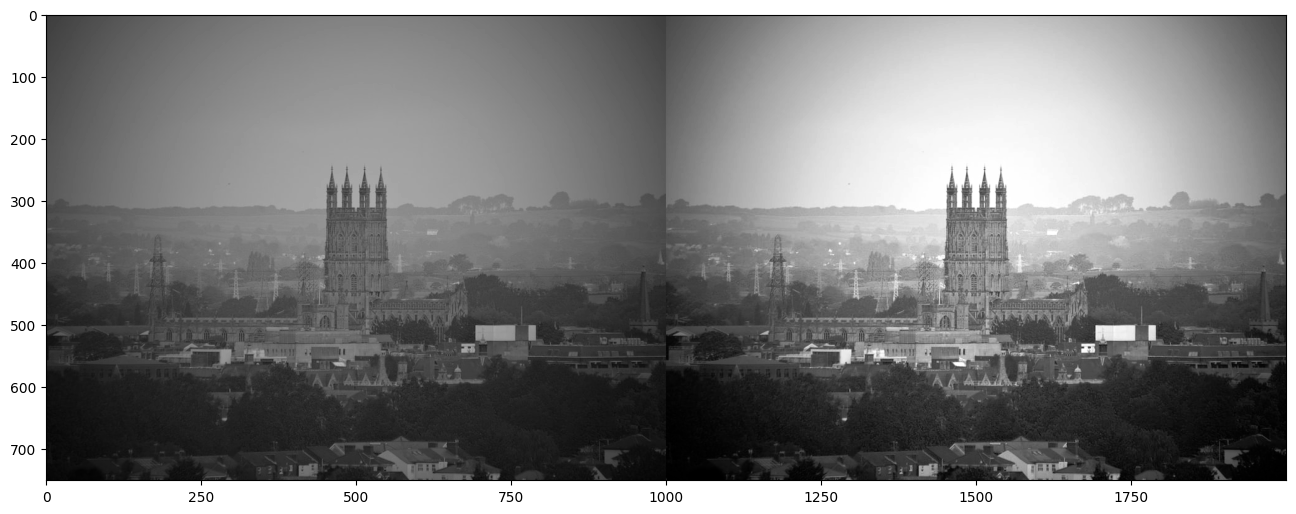

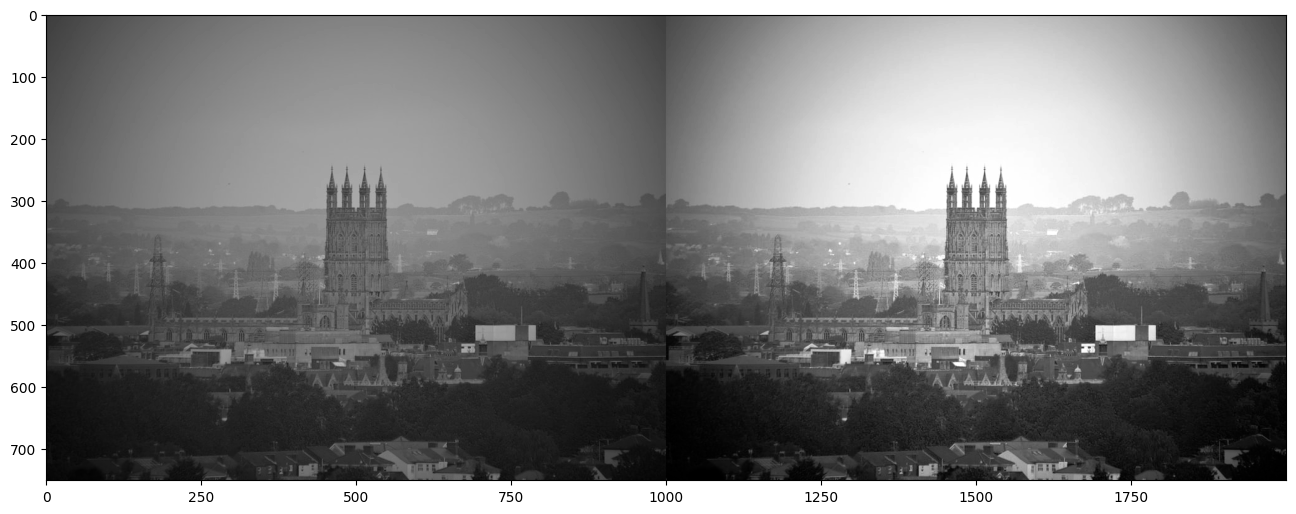

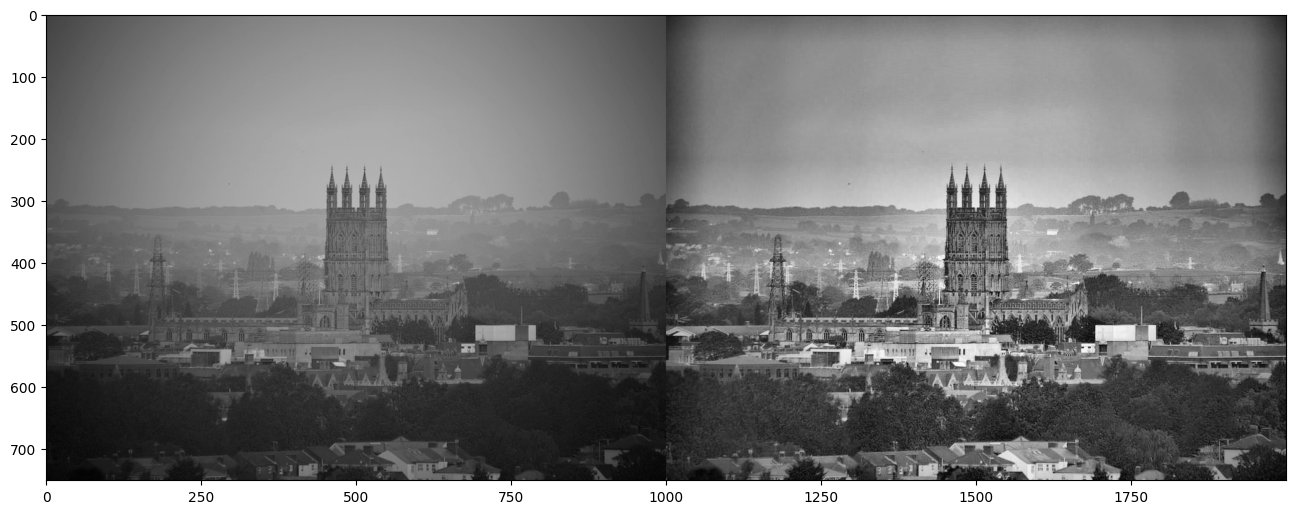

In [46]:
#الف

img = cv2.imread('City.jpg', 0)
equ = hist_equ(img)
res = np.hstack((img, equ))
plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

equ2 = cv2.equalizeHist(img)
res2 = np.hstack((img, equ2))

plt.figure(figsize=(16, 16))
plt.imshow(res2, cmap='gray')

#ب

clh = CLAHE(img, (8,8), 3.0)
res = np.hstack((img, clh))
plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')